<a href="https://colab.research.google.com/github/kenltho2/scratch-work/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 2: Differentiation
**Numerical Methods CPSMA 4413, Dr. Jacob \\
Kennedy Thomas (sole member of Group 11)**

#**Programming the Derivative Approximations**
**I started this project by recycling and updating the error functions I wrote in Project 1, as they still work but still have room for improvement. Next, I wrote a function that simply returns $e^x$ at any given x.**

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def TrueError(true_value, approx_value):
    terror = true_value - approx_value
    return terror

def rTrueError(true_value,approx_value):
    rterror = (true_value - approx_value) / true_value
    return rterror

 
#Updated relative True Error function to take true_value and approx_value rather
#than TrueError and true_value to make input less time consuming

 
def f(x):
  return math.exp(x)

**I am ready to write my functions for approximating the derivative using the Forward Divided Difference (FDD) method, the Backward Divided Difference (BDD) method, and the Central Divided Difference (CDD) method.**

In [ ]:
def fdd(x,h):
  fdd_dx = (f(x + h) - f(x)) / h
  return fdd_dx

def bdd(x,h):
  bdd_dx = (f(x) - f(x - h)) / h
  return bdd_dx

def cdd(x,h):
  cdd_dx = (f(x + h) - f(x - h)) / (2 * h)
  return cdd_dx

def secondorder(x,h):
  sodx = (f(x + h) - 2 * f(x) + f(x - h)) / (h**2)
  return sodx 

  

#**Error Dataframes**
**With the functions written, I can begin to organize the data. Below are several dataframes, each containing the approximations using each method and the true error and relative error of each approximation at 5 different values for h.**

In [ ]:
#General Pandas dataframe that contains all of the approximations for the derivative and the actual value.

d = {'Step Size (h)': [0.1,0.05,0.025,0.0125,0.00625],
     'e^x':[f(2),f(2),f(2),f(2),f(2)],
     'FDD':[fdd(2,0.1),fdd(2,0.05),fdd(2,0.025),fdd(2,0.0125),fdd(2,0.00625)],
     'BDD':[bdd(2,0.1),bdd(2,0.05),bdd(2,0.025),bdd(2,0.0125),bdd(2,0.00625)],
     'CDD':[cdd(2,0.1),cdd(2,0.05),cdd(2,0.025),cdd(2,0.0125),cdd(2,0.00625)],
     'f"(x) approximation':[secondorder(2,0.1),secondorder(2,0.05),secondorder(2,0.025),secondorder(2,0.0125),secondorder(2,0.00625)]
     }

df = pd.DataFrame(data=d)
df

,Step Size (h),e^x,FDD,BDD,CDD,"f""(x) approximation"
0,0.10000,7.389056,7.771138,7.031617,7.401377,7.395216
1,0.05000,7.389056,7.576900,7.207370,7.392135,7.390596
2,0.02500,7.389056,7.482194,7.297458,7.389826,7.389441
3,0.01250,7.389056,7.435431,7.343066,7.389249,7.389152
4,0.00625,7.389056,7.412195,7.366013,7.389104,7.389080


In [ ]:
#Pandas dataframe for the forward difference and the absolute and relative error.


r = {'FDD':[fdd(2,0.1),fdd(2,0.05),fdd(2,0.025),fdd(2,0.0125),fdd(2,0.00625)],
     'e^x':[f(2),f(2),f(2),f(2),f(2)],
     'True Error':[TrueError(f(2),fdd(2,0.1)),TrueError(f(2),fdd(2,0.05)),TrueError(f(2),fdd(2,0.025)),TrueError(f(2),fdd(2,0.0125)),TrueError(f(2),fdd(2,0.00625))],
     'Relative True Error': [rTrueError(f(2),fdd(2,0.1)),rTrueError(f(2),fdd(2,0.05)),rTrueError(f(2),fdd(2,0.025)),rTrueError(f(2),fdd(2,0.0125)),rTrueError(f(2),fdd(2,0.00625))]
     }

df_forward = pd.DataFrame(data=r)
df_forward

,FDD,e^x,True Error,Relative True Error
0,7.771138,7.389056,-0.382082,-0.051709
1,7.576900,7.389056,-0.187844,-0.025422
2,7.482194,7.389056,-0.093138,-0.012605
3,7.435431,7.389056,-0.046375,-0.006276
4,7.412195,7.389056,-0.023139,-0.003132


In [ ]:
#Pandas dataframe for the backward difference and the absolute and relative error.


b = {'BDD':[bdd(2,0.1),bdd(2,0.05),bdd(2,0.025),bdd(2,0.0125),bdd(2,0.00625)],
     'e^x':[f(2),f(2),f(2),f(2),f(2)],
     'True Error':[TrueError(f(2),bdd(2,0.1)),TrueError(f(2),bdd(2,0.05)),TrueError(f(2),bdd(2,0.025)),TrueError(f(2),bdd(2,0.0125)),TrueError(f(2),bdd(2,0.00625))],
     'Relative True Error': [rTrueError(f(2),bdd(2,0.1)),rTrueError(f(2),bdd(2,0.05)),rTrueError(f(2),bdd(2,0.025)),rTrueError(f(2),bdd(2,0.0125)),rTrueError(f(2),bdd(2,0.00625))]
     }

df_backward = pd.DataFrame(data=b)
df_backward

,BDD,e^x,True Error,Relative True Error
0,7.031617,7.389056,0.357440,0.048374
1,7.207370,7.389056,0.181686,0.024588
2,7.297458,7.389056,0.091598,0.012396
3,7.343066,7.389056,0.045990,0.006224
4,7.366013,7.389056,0.023043,0.003118


In [ ]:
#Pandas dataframe for the central difference and the absolute and relative error.


c = {'CDD':[cdd(2,0.1),cdd(2,0.05),cdd(2,0.025),cdd(2,0.0125),cdd(2,0.00625)],
     'e^x':[f(2),f(2),f(2),f(2),f(2)],
     'True Error':[TrueError(f(2),cdd(2,0.1)),TrueError(f(2),cdd(2,0.05)),TrueError(f(2),cdd(2,0.025)),TrueError(f(2),cdd(2,0.0125)),TrueError(f(2),cdd(2,0.00625))],
     'Relative True Error': [rTrueError(f(2),cdd(2,0.1)),rTrueError(f(2),cdd(2,0.05)),rTrueError(f(2),cdd(2,0.025)),rTrueError(f(2),cdd(2,0.0125)),rTrueError(f(2),cdd(2,0.00625))]
     }

df_central = pd.DataFrame(data=c)
df_central

,CDD,e^x,True Error,Relative True Error
0,7.401377,7.389056,-0.012321,-0.001668
1,7.392135,7.389056,-0.003079,-0.000417
2,7.389826,7.389056,-0.000770,-0.000104
3,7.389249,7.389056,-0.000192,-0.000026
4,7.389104,7.389056,-0.000048,-0.000007


#**Lagrange Interpolation**
**The Lagrange Interpolation is a linear combination used to approximate the derivative of a function given k+1 data points. It is defined as follows:**

$L(x)=\sum_{j=0}^{k}y_jl_j(x)$ \\

\\
**Where**

$l_j(x)= \prod_{i=0,i\neq j}^{k}\frac{x-x_i}{x_j-x_i}$ \\

**For this particular assignment, we are given 3 data points. So the degree of the polynomial will be 3-1=2. I begin by setting up two arrays to hold my x and y points. Next, I created an array to hold the data given by the Lagrange Interpolation. I then wrote the for loop that performs the interpolation. I then graphed the points, the interpolation, and the derivative of my function. From Calculus I, we know $\frac{d}{dx}(e^x)=e^x$, so I did not have to do any extra calculations to find the exact value of the derivative at the given points.**

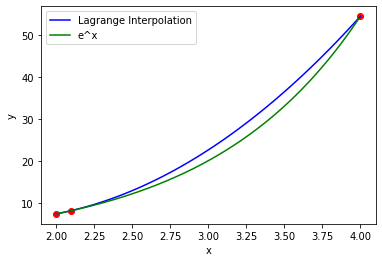

In [ ]:
x = np.array([2,2.1,4])

y = np.array([f(2),f(2.1),f(4)])

xl = np.linspace(x_values[0],x_values[-1])

yl = np.array([])

for px in xl:
  py = 0
  for xi,yi in zip(x,y):
    py += yi * np.prod((px - x[x!=xi]) / (xi - x[x!=xi]))
  yl = np.append(yl,py)

x_true = np.arange(2,4,.01)
plt.plot(x,y,'ro')
plt.plot(xl,yl,'b-', label = 'Lagrange Interpolation')
plt.plot( x_true,np.exp(x_true),'g-', label = 'e^x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [39]:
#x and y values for the Lagrange Interpolation of e^x

df_l = pd.DataFrame(yl,xl)
df_l

,0
2.000000,7.389056
2.040816,7.686115
2.081633,8.010940
2.122449,8.363531
2.163265,8.743889
2.204082,9.152013
2.244898,9.587903
2.285714,10.051560
2.326531,10.542983
2.367347,11.062173


In [ ]:
print(f(2.204082))

9.06192889760724


**From the table above, we see that $L(2.204)=9.152$. For the sake of continuity, I used the unrounded numbers in all of the calculations. With that being said, I found the true value of $e^x$ at $x=2.204082$. With that number I found the true error of the Lagrange Interpolation at $x\approx2.2$.**

In [40]:
print(TrueError(f(2.204082),9.152013))
print(rTrueError(f(2.204082),9.152013))

-0.0900841023927601
-0.009940941206959413


**With a true error of approximately -0.090 and a relative true error of -0.010, the Lagrange polynomial is more than 99% accurate at $x\approx2.2$.**

#**Conclusion**
**With each approximation, the error varies. The error is negative when using the FDD method and positive when using the BDD method. The CDD method is the most accurate. It is useless to approximate the derivative of a known function because it is inaccurate to varying degrees, based on the step size. However it is important to understand how it works and why it works. The interpolating factors are different polynomial quotients that are multiplied onto each other. They use the x values given in the data set to determine where the curve should go.**
